# Recidivism

Potential modelling cases

- Classification for recidivism prediction
- Regression for supervision score
- Classification for substance abuse

We are especially interested in recidivism since a prediction for an offender to reoffend can affect length of sentence and opportunity for probation. [kilde]  

What aspects of bias, fairness and/or explainability 
- Accuracy for protected groups (in this case race, gender) in regards to recidivism 

Methods
- Cleaning and investigating data. Avoiding data leakage
- Balance model complexity with size of data
- Trying a range of different models using a validation set (keeping test set to last test). 
- PCA(?)
- Evaluating accuracy and fairness metrics using e.g. confusion matrix



Tentative ethical questions
- 

Dataset Documentation: https://nij.ojp.gov/funding/recidivism-forecasting-challenge#19-0

 The data only contains individuals with the racial categories of Black and White to reduce the possibility of deductive disclosure of individuals identities. There were less than 500 individuals who were identified as Hispanic, and less than 100 individuals in each of the following categories Asian, Native American, other, and unknown; these cases were dropped from the sample to prevent inadvertent disclosure of personal Identifying information.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# Loading the dataset
df = pd.read_csv('exam_data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')

# Target is whether or not they reoffend
target=df['Recidivism_Within_3years']

# Protected features
grouprace=df['Race']
groupsex=df['Gender']

X_train, X_test, y_train, y_test, grouprace_train, grouprace_test, groupsex_train, group_sex_test = train_test_split(
    df, target, grouprace, groupsex, test_size=0.2, random_state=0)






## Demographic of offenders

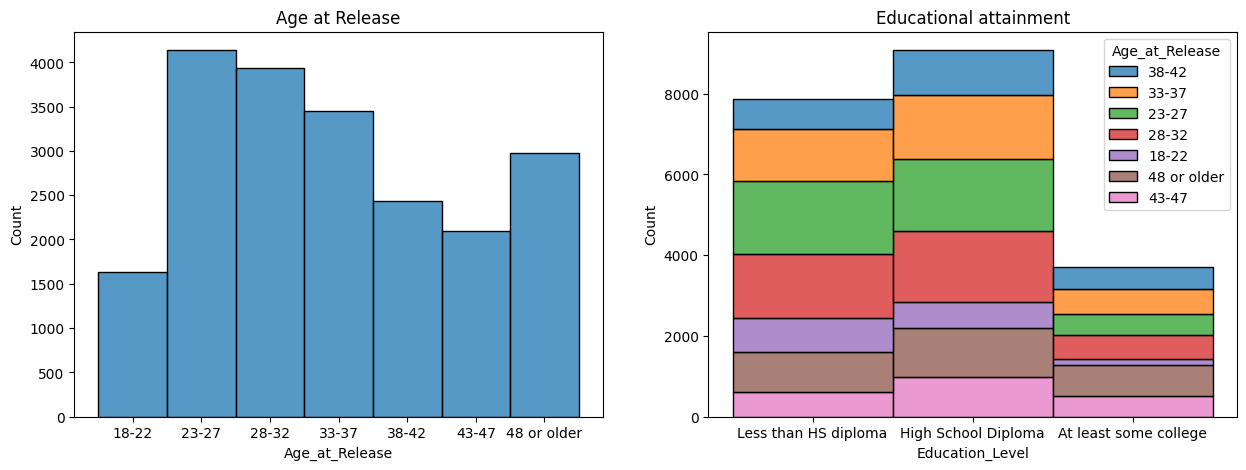

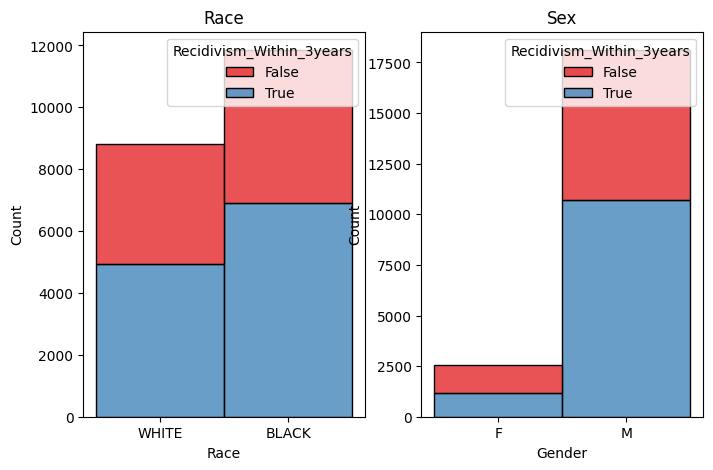

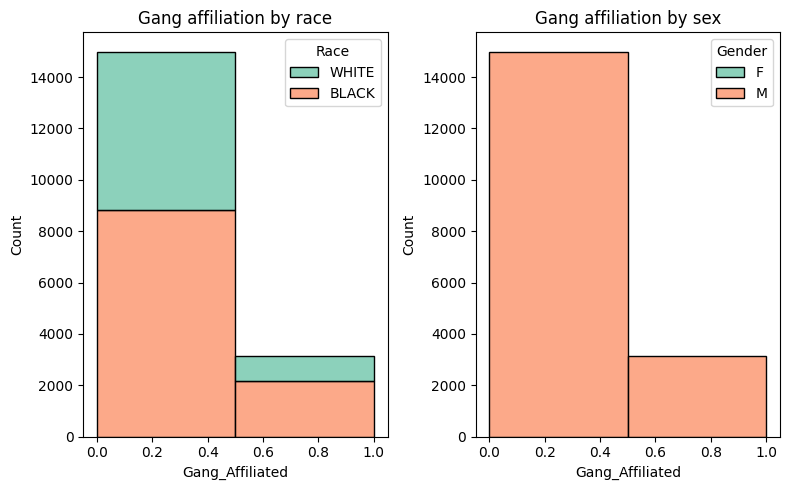

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

sns.histplot(X_train['Age_at_Release'].sort_values(), bins=5, ax=axes[0])
axes[0].set_title('Age at Release')

X_train['Education_Level'] = pd.Categorical(X_train['Education_Level'], ['Less than HS diploma', 'High School Diploma', 'At least some college'])
sns.histplot(data=X_train, x='Education_Level', bins=3, ax=axes[1], hue='Age_at_Release', multiple='stack')
axes[1].set_title('Educational attainment')


fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # Recidivism

sns.histplot(x='Race', data=X_train, ax=axes[0], bins=2, palette='Set1', hue='Recidivism_Within_3years', multiple='stack')
axes[0].set_title('Race')

sns.histplot(x='Gender', data=X_train, ax=axes[1], bins=2, palette='Set1', hue='Recidivism_Within_3years', multiple='stack')
axes[1].set_title('Sex')

fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # 1 row, 2 columns

sns.histplot(x='Gang_Affiliated', data=X_train, ax=axes[0], bins=2, palette='Set2', hue='Race', multiple='stack')
axes[0].set_title('Gang affiliation by race')


sns.histplot(x='Gang_Affiliated', data=X_train, ax=axes[1], bins=2, palette='Set2', hue='Gender', multiple='stack')
axes[1].set_title('Gang affiliation by sex')
# The Gang affiliation values for females are NaN!

plt.tight_layout()

In [113]:
# Chekcing for missing female gang affiliation values
print(X_train.groupby(['Gender', 'Gang_Affiliated']).size())
print(X_train.groupby(['Gender']).size())

Gender  Gang_Affiliated
M       False              14992
        True                3122
dtype: int64
Gender
F     2554
M    18114
dtype: int64


## Risk score and recidivism

We are provided with a risk score, it could be interesting to investigate if there is a bias or if it's reasonably correlated with recidivism (or how violent the crime is). We see a potential for the risk score to be biased.

Text(0.5, 1.0, 'Risk score and type of offense')

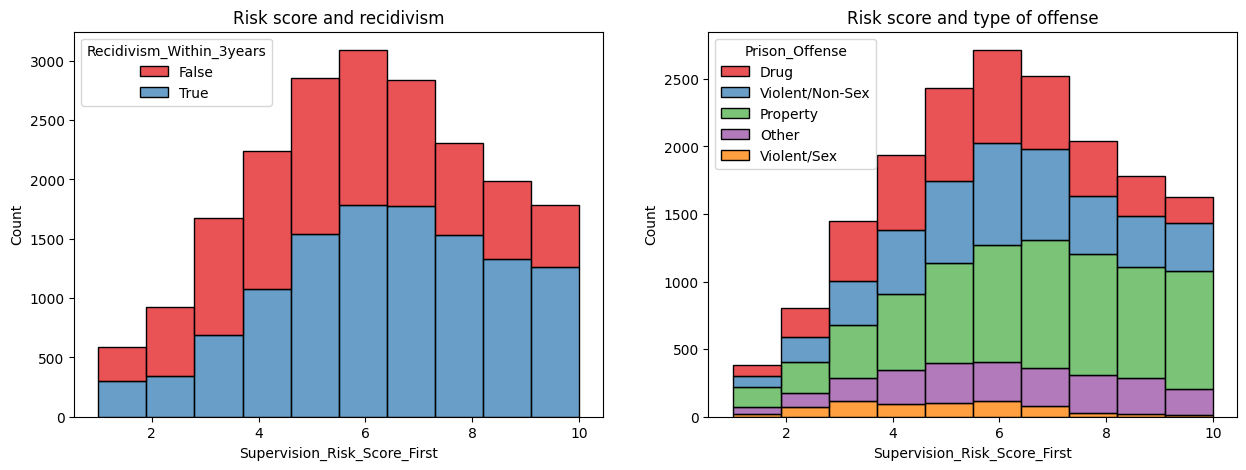

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Recidivism

sns.histplot(x='Supervision_Risk_Score_First', data=X_train, ax=axes[0], bins=10, palette='Set1', hue='Recidivism_Within_3years', multiple='stack')
axes[0].set_title('Risk score and recidivism')

sns.histplot(x='Supervision_Risk_Score_First', data=X_train, ax=axes[1], bins=10, palette='Set1', hue='Prison_Offense', multiple='stack')
axes[1].set_title('Risk score and type of offense')


In [32]:
print(df['Prison_Offense'].unique())

['Drug' 'Violent/Non-Sex' 'Property' nan 'Other' 'Violent/Sex']
